# A PGM for the Hubble diagram

This notebook presents and justifies a probabilistic graphical model (PGM) for the Hubble diagram.  It can be used to infer cosmological parameters and as the basis for a generative model of mock data to validate a code executing such an inference.

We will use the `daft` package to create a directed acyclic graph corresponding to our model for the data.

In [ ]:
import matplotlib
%matplotlib inline

from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

## Hyperparameters

This model has two sets of hyperparameters: the cosmological parameters and the supernova parameters.  The cosmological parameters $\vec{\theta}$ include $H_{0}$, $\Omega_{m}$, etc.  The supernova parameters $\underline{\Phi}$ define $N(z,T)$, the supernova number distribution as a function of type and redshift.  In a PGM, parameters that are random variables are shown in circles.  The hyperparameters are random variables in the sense that they themselves are drawn from a prior probability distribution corresponding to the infamous criticism of Bayesian inference, that one must always choose a prior.

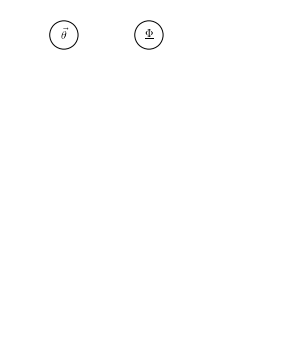

In [44]:
#initialize the PGM
pgm = daft.PGM([5, 6], origin=[0, 0])

#desired hyperparameters
pgm.add_node(daft.Node("cosmology", r"$\vec{\theta}$", 1., 5.5))
pgm.add_node(daft.Node("dist", r"$\underline{\Phi}$", 2.5, 5.5))

# Render
pgm.render()
pgm.figure.show()

## Latent Variables

Next, we consider the latent variables over which we would like to marginalize.  Each supernova $n$ in a universe containing $N$ supernovae has a distance modulus $\mu_{n}$, redshift $z_{n}$, and type $T_{n}$.  These unobserved parameters are random variables independently sampled from functions of the hyperparameters and in some cases other parameters, so they will be represented by circles in our PGM.  Furthermore, because there are $N$ supernovae each with independently sampled values of these parameters, we place the parameters in a box, making a note that there are $N$ trios of these parameters in the universe corresponding to their unique identifier $n$.  These relationships between parameters and all other parameters and hyperparameters that define them will be represented by arrows from the hyperparameters to the variables sampled from them.  However, we do not aim to estimate these parameters nor to sample them.  Rather, given their posterior probabilities, they will be integrated out.

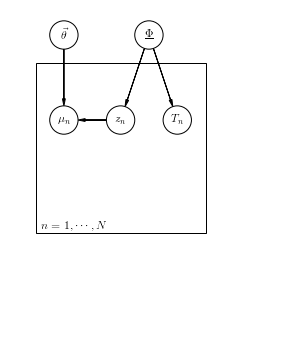

In [46]:
#initialize the PGM
pgm = daft.PGM([5, 6], origin=[0, 0])

#desired hyperparameters
pgm.add_node(daft.Node("cosmology", r"$\vec{\theta}$", 1., 5.5))
pgm.add_node(daft.Node("dist", r"$\underline{\Phi}$", 2.5, 5.5))

#latent variables/parameters
pgm.add_node(daft.Node("distance", r"$\mu_{n}$", 1., 4))
pgm.add_node(daft.Node("redshift", r"$z_{n}$", 2., 4))
pgm.add_node(daft.Node("type", r"$T_{n}$", 3., 4))

# Add in the edges.
pgm.add_edge("dist", "type")
pgm.add_edge("cosmology", "distance")
pgm.add_edge("dist", "redshift")
pgm.add_edge("redshift", "distance")

# plates
pgm.add_plate(daft.Plate([0.5, 2., 3., 3.], label=r"$n = 1, \cdots, N$"))

# Render
pgm.render()
pgm.figure.show()

## Observed variables

The observable data is comprised of supernova lightcurves $\{\underline{\ell}_{n}\}_{N}$ and host galaxy fluxes $\{\vec{f}_{n}\}_{N}$.  These are functions of $\mu_{n}$, $z_{n}$, and $T_{n}$ with some scatter due to the natural variation between supernovae.  Observed quantities are shown in shaded circles in the PGM.

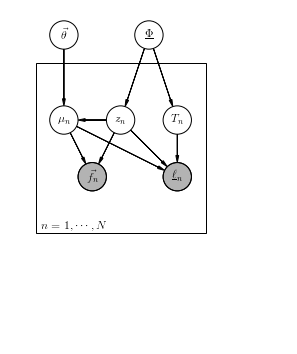

In [59]:
#initialize the PGM
pgm = daft.PGM([5, 6], origin=[0, 0])

#desired hyperparameters
pgm.add_node(daft.Node("cosmology", r"$\vec{\theta}$", 1., 5.5))
pgm.add_node(daft.Node("dist", r"$\underline{\Phi}$", 2.5, 5.5))
#pgm.add_node(daft.Node("rates", r"$\vec{R}$", 3., 5.5, fixed=True))

#latent variables/parameters
pgm.add_node(daft.Node("distance", r"$\mu_{n}$", 1., 4))
pgm.add_node(daft.Node("redshift", r"$z_{n}$", 2., 4))
pgm.add_node(daft.Node("type", r"$T_{n}$", 3., 4))

#data
pgm.add_node(daft.Node("lightcurve", r"$\underline{\ell}_{n}$", 3., 3., observed=True))
pgm.add_node(daft.Node("photometry", r"$\vec{f}_{n}$", 1.5, 3., observed=True))

# Add in the edges.
pgm.add_edge("dist", "type")
pgm.add_edge("cosmology", "distance")
pgm.add_edge("dist", "redshift")
pgm.add_edge("redshift", "distance")
pgm.add_edge("distance", "photometry")
pgm.add_edge("distance", "lightcurve")
pgm.add_edge("redshift", "photometry")
pgm.add_edge("redshift", "lightcurve")
pgm.add_edge("type", "lightcurve")

# plates
pgm.add_plate(daft.Plate([0.5, 2., 3., 3.], label=r"$n = 1, \cdots, N$"))

# Render and save.
pgm.render()
pgm.figure.savefig("Hubble-draft.png", dpi=150)
pgm.figure.show()

# UNFINISHED AFTER THIS POINT!

## Known variables

There are other parameters comprising $\vec{S}$ that determine whether a supernova is included in the survey's catalog, which define a selection function.  These are in general limits imposed in the space of data.  We will make the assumption that we know $\vec{S}$.  Parameters that have known values are shown as dots in a PGM.

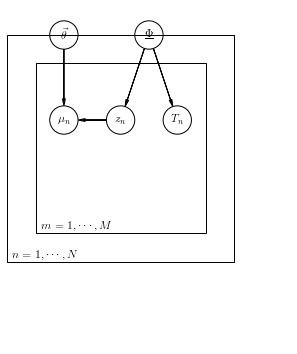

In [51]:
#initialize the PGM
pgm = daft.PGM([5, 6], origin=[0, 0])

#desired hyperparameters
pgm.add_node(daft.Node("cosmology", r"$\vec{\theta}$", 1., 5.5))
pgm.add_node(daft.Node("dist", r"$\underline{\Phi}$", 2.5, 5.5))

#latent variables/parameters
pgm.add_node(daft.Node("distance", r"$\mu_{n}$", 1., 4))
pgm.add_node(daft.Node("redshift", r"$z_{n}$", 2., 4))
pgm.add_node(daft.Node("type", r"$T_{n}$", 3., 4))
pgm.add_node(daft.Node("selection", r"$\vec{S}$", 4., 4, fixed=True))

# Add in the edges.
pgm.add_edge("dist", "type")
pgm.add_edge("cosmology", "distance")
pgm.add_edge("dist", "redshift")
pgm.add_edge("redshift", "distance")

# plates
pgm.add_plate(daft.Plate([0.5, 2., 3., 3.], label=r"$m = 1, \cdots, M$"))
pgm.add_plate(daft.Plate([0., 1.5, 4., 4.], label=r"$n = 1, \cdots, N$"))

# Render
pgm.render()
pgm.figure.show()